#Conexão do Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importação das Bibliotecas.

In [ ]:
import re
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow import keras

# Importação e Leitura das Imagens.

In [ ]:
Cats = ('/content/drive/MyDrive/test_set/test_set/cats')
Cats_tr = ('/content/drive/MyDrive/training_set/training_set/cats')
Dogs = ('/content/drive/MyDrive/test_set/test_set/dogs')
Dogs_tr = ('/content/drive/MyDrive/training_set/training_set/dogs')

In [ ]:
def imagens_cats(pasta_imagens):
  
  imagens = []

  for img in listdir(pasta_imagens):
    cm = '/content/drive/MyDrive/test_set/test_set/cats/' + img
    imagens.append(cm)
  return imagens

In [ ]:
def imagens_cats_tr(pasta_imagens):
  
  imagens = []

  for img in listdir(pasta_imagens):
    cm = '/content/drive/MyDrive/training_set/training_set/cats/' + img
    imagens.append(cm)
  return imagens

In [ ]:
def imagens_dogs(pasta_imagens):
  
  imagens = []

  for img in listdir(pasta_imagens):
    cm = '/content/drive/MyDrive/test_set/test_set/dogs/' + img
    imagens.append(cm)
  return imagens

In [ ]:
def imagens_dogs_tr(pasta_imagens):
  
  imagens = []

  for img in listdir(pasta_imagens):
    cm = '/content/drive/MyDrive/training_set/training_set/dogs/' + img
    imagens.append(cm)
  return imagens

In [ ]:
Cats_teste = imagens_cats(Cats)
Cats_treino = imagens_cats_tr(Cats_tr)
Dogs_teste = imagens_dogs(Dogs)
Dogs_treino = imagens_dogs_tr(Dogs_tr)

In [ ]:
len(Cats_teste)

1012

In [ ]:
len(Cats_treino)

4000

In [ ]:
len(Dogs_teste)

1013

In [ ]:
len(Dogs_treino) 

4005

# Visualização das Imagens.

In [ ]:
imagem_cat1 = cv2.imread(Cats_teste[0],cv2.IMREAD_GRAYSCALE)
imagem_cat2 = cv2.imread(Cats_treino[0])
imagem_dog1 = cv2.imread(Dogs_teste[0])
imagem_dog2 = cv2.imread(Dogs_treino[0])

In [ ]:
def visualizacao(imagem1,imagem2):

  linha = 1
  colunas = 2
  fig = plt.figure(figsize=(10,8))

  imagem1 = cv2.cvtColor(imagem1,cv2.COLOR_BGR2RGB)
  imagem2 = cv2.cvtColor(imagem2,cv2.COLOR_BGR2RGB)

  fig.add_subplot(linha,colunas,1)
  plt.imshow(imagem1)
  fig.add_subplot(linha,colunas,2)
  plt.imshow(imagem2)
  plt.show()

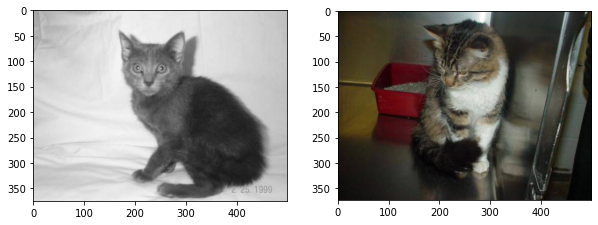

In [ ]:
visualizacao(imagem_cat1,imagem_cat2)

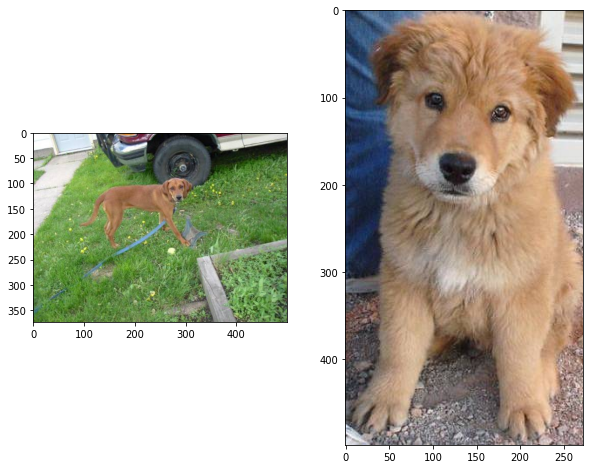

In [ ]:
visualizacao(imagem_dog1,imagem_dog2)

# Tratamento das Imagens.

In [ ]:
label = [0,1]
nome_labels = ['gato','cachorro']

In [ ]:
def labels(pasta_imagens1,pasta_imagens2):
  
  label = []

  for cat in listdir(pasta_imagens1):
    busca_cat = re.findall('cat',cat)
    if busca_cat:
      label.append(0)
  for dog in listdir(pasta_imagens2):
    busca_dog = re.findall('dog',dog)
    if busca_dog:
      label.append(1)
      
  return label

In [ ]:
def padronizacao(imagem):

  imagem_lida = []

  for img in imagem:
    img_array = cv2.imread(img,cv2.COLOR_BGR2GRAY)
    img_redimensionada = cv2.resize(img_array,(250,250),interpolation=cv2.INTER_LANCZOS4)
    img_size = img_redimensionada/255.0
    imagem_lida.append(img_size)

  return imagem_lida

In [ ]:
labels_treino = labels(Cats_tr,Dogs_tr)
len(labels_treino)

8005

In [ ]:
labels_teste = labels(Cats,Dogs)
len(labels_teste)

2023

In [ ]:
print(Cats_treino[999])
print(Dogs_treino[999])

/content/drive/MyDrive/training_set/training_set/cats/cat.2800.jpg
/content/drive/MyDrive/training_set/training_set/dogs/dog.280.jpg


In [ ]:
print(Cats_teste[999])
print(Dogs_teste[999])

/content/drive/MyDrive/test_set/test_set/cats/.ipynb_checkpoints
/content/drive/MyDrive/test_set/test_set/dogs/.ipynb_checkpoints


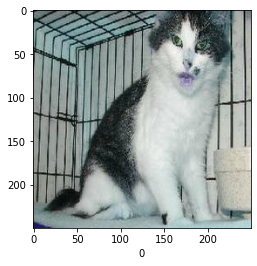

In [ ]:
testando = padronizacao(Cats_treino[0:10])
plt.imshow(testando[6])
plt.xlabel(labels_treino[6])
plt.show()

In [ ]:
imagem_cats_treino = padronizacao(Cats_treino[0:998])
img_cats_treino = padronizacao(Cats_treino[1000:-1])
imagem_dogs_treino = padronizacao(Dogs_treino[0:998])
img_dogs_treino = padronizacao(Dogs_treino[1000:-1])

In [ ]:
imagem_cats_teste = padronizacao(Cats_teste[0:998])
img_cats_teste = padronizacao(Cats_teste[1000:-1])
imagem_dogs_teste = padronizacao(Dogs_teste[0:998])
img_dogs_teste = padronizacao(Dogs_teste[1000:-1])

In [ ]:
imagens_treino = []
for imgs1 in imagem_cats_treino:
  imagens_treino.append(imgs1)
for imgs2 in img_cats_treino:
  imagens_treino.append(imgs1)
for imgs3 in imagem_dogs_treino:
  imagens_treino.append(imgs1)
for imgs4 in img_dogs_treino:
  imagens_treino.append(imgs1)

In [ ]:
imagens_teste = []
for imgs1 in imagem_cats_teste:
  imagens_teste.append(imgs1)
for imgs2 in img_cats_teste:
  imagens_teste.append(imgs1)
for imgs3 in imagem_dogs_teste:
  imagens_teste.append(imgs1)
for imgs4 in img_dogs_teste:
  imagens_teste.append(imgs1)

In [ ]:
del(labels_treino[7999:8005])
del(labels_teste[2019:2023])

In [ ]:
print(f'Imagens de Treino: {len(imagens_treino)}\nImagens de Teste: {len(imagens_teste)}')
print(f'Labels de Treino: {len(labels_treino)}\nLabels de Teste: {len(labels_teste)}')

In [ ]:
plt.imshow(imagens_teste[60])
plt.xlabel(labels_teste[60])
plt.show()

# Cnstrução do Modelo e Avaliação do Algoritmo.

In [ ]:
modelo = Keras.Sequential([
    Keras.layers.Flatten(input_shape=(250,250)),
    Keras.layers.Dense(80,activation='softmax'),
    Keras.layers.Dense(160,activation='softmax'),
    Keras.layers.Dense(2,activation='softmax'),
])

In [ ]:
stop = Keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
               )

In [ ]:
modelo.summary()

In [ ]:
modelo.fit(imagens_treino,labels_treino,epochs=20,callbacks=stop)

In [ ]:
loss_teste,acuracia_teste = modelo.evaluate(imagens_teste,labels_teste)
print(f'Loss: {loss_teste}   ||   Acuracia: {acuracia_teste}')

In [ ]:
classificacao_modelo = modelo.predict(imagens_teste)

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(classificacao_modelo[0])
plt.xticks([])
plt.yticks([])
plt.xlabels(labels_teste[0])